<a href="https://colab.research.google.com/github/Kenuuey/LLMs/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Agent 1

In [1]:
!pip install -qqq langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 12.6 MB/s eta 0:00:00


In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict): # state schema
  message : str


def greeting_node(state: AgentState) -> AgentState:
  """Simple node that adds a greeting message to the state"""
  state['message'] = 'Hey ' + state['message'] + ', how is your day going?'
  return state

def compliment_node(state: AgentState) -> AgentState:
  """Node that adds a personalized compliment agent"""
  state['message'] = state['message'] + ' Nice to meet you!'
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node('greeter', greeting_node)
graph.add_node('compliment', compliment_node)

graph.add_edge('greeter', 'compliment')

graph.set_entry_point('greeter')
graph.set_finish_point('greeter')

app = graph.compile()

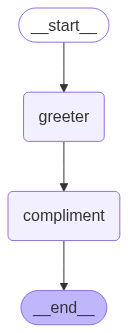

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({'message': 'Bob'})
print(result['message'])

Hey Bob, how is your day going? Nice to meet you!


### Agent 2

In [ ]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph
from functools import reduce
from operator import mul
import math


In [ ]:
class AgentState(TypedDict):
  name: str
  operation: str
  values: List[int]
  result: str

In [ ]:
def process_values(state: AgentState) -> AgentState:
  """This function handles multiple different inputs"""
  print(state)

  if state["operation"] == '+':
    state["result"] = f'Hi there {state["name"]}! Your answer = {sum(state["values"])}'
  elif state["operation"] == '*':
    # state["result"] = f'Hi there {state["name"]}! Your answer = {reduce(mul, state["values"])}'
    state["result"] = f'Hi there {state["name"]}! Your answer = {math.prod(state["values"])}'

  print(state)
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node('processor', process_values)

graph.set_entry_point('processor')
graph.set_finish_point('processor')

app = graph.compile()

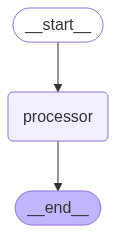

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
answers = app.invoke({"values": [1, 2, 3, 4], "name": "Steve", "operation": "+"})

{'name': 'Steve', 'operation': '+', 'values': [1, 2, 3, 4]}
{'name': 'Steve', 'operation': '+', 'values': [1, 2, 3, 4], 'result': 'Hi there Steve! Your answer = 10'}


In [ ]:
print(answers['result'])

Hi there Steve! Your answer = 10


In [ ]:
answers = app.invoke({"values": [1, 2, 3, 4], "name": "Steve", "operation": "*"})

{'name': 'Steve', 'operation': '*', 'values': [1, 2, 3, 4]}
{'name': 'Steve', 'operation': '*', 'values': [1, 2, 3, 4], 'result': 'Hi there Steve! Your answer = 24'}


In [ ]:
print(answers['result'])

Hi there Steve! Your answer = 24


### Agent 3

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  final: str

In [ ]:
def first_node(state: AgentState) -> AgentState:
  """This is the first node of our sequence"""
  state["final"] = f"Hi {state['name']}!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node of our sequence"""
  state["final"] += f" You are {state['age']} years old!"
  return state

def third_node(state: AgentState) -> AgentState:
  """This is the third node of our sequence"""
  if state['skills']:
        skills_str = ", ".join(state['skills'])
        state["final"] += f" You have skills in {skills_str}."
  else:
      state["final"] += " You have no listed skills."
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()

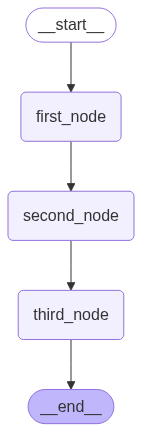

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name": "Charlie", "age": "20", "skills": list()})
print(result['final'])

Hi Charlie! You are 20 years old! You have no listed skills.


In [ ]:
result = app.invoke({"name": "Linda", "age": "31", "skills": ['Python', 'Machine Learning', 'LangGraph']})
print(result['final'])

Hi Linda! You are 31 years old! You have skills in Python, Machine Learning, LangGraph.


### Agent 4

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [20]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int
  number3: int
  operation2: str
  number4: int
  finalNumber2: int

In [29]:
def adder(state: AgentState) -> AgentState:
  """This node adds the 2 numbers"""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState) -> AgentState:
  """This node subtracts the 2 numbers"""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def adder2(state: AgentState) -> AgentState:
  """This node adds the 2 numbers"""
  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def subtractor2(state: AgentState) -> AgentState:
  """This node subtracts the 2 numbers"""
  state['finalNumber2'] = state['number3'] - state['number4']
  return state

def decide_next_node(state: AgentState) -> str:
  """This node will select the next node of the graph"""
  if state['operation'] == '+':
    return "addition_operation"
  elif state['operation'] == '-':
    return "subtract_operation"

def decide_next_node2(state: AgentState) -> str:
  """Router for the second operation"""
  if state['operation2'] == '+':
    return "addition_operation"
  elif state['operation2'] == '-':
    return "subtract_operation"

In [37]:
graph = StateGraph(AgentState)

graph.add_node("router", lambda state: state)
graph.add_node("add_node", adder)
graph.add_node('subtract_node', subtractor)

graph.add_node('router2', lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node('subtract_node2', subtractor2)

graph.add_edge(START, 'router')

graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
      'addition_operation': 'add_node',
      'subtract_operation': 'subtract_node'
    }
)

graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
      'addition_operation': 'add_node2',
      'subtract_operation': 'subtract_node2'
    }
)

graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)


app = graph.compile()

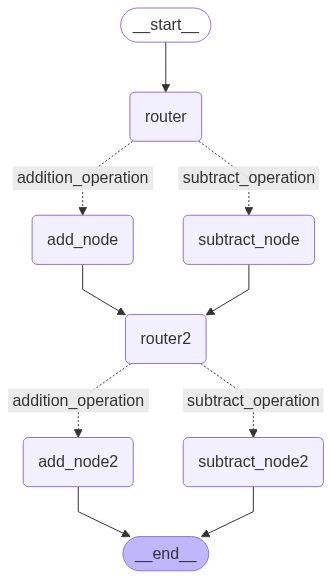

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
state = AgentState(
    number1=10, operation="-", number2=5, finalNumber=0,
    number3=7, operation2="+", number4=3, finalNumber2=0
)
print(app.invoke(state))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 3, 'finalNumber2': 10}


### Agent 5